# Dados Macro:

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as web

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set()

# Objetivo:
Obter e explorar algumas das principais variáveis macroeconômicas.

## Tópicos:

## Atividade Econômica
* IBC-Br
* PIB
* Atividade Industrial
* Índices de Confiança

## Mercado de Trabalho
* PNAD
* CAGED

## Índices de Preços
* IGPM
* IPCA
* IC-Br

## Indicadores Monetários e de Crédito
* Selic
* Curva de Juros
* Saldo Total de Crédito
* Saldo Total de Recursos Livres
* Saldo Total de Recursos Direcionados
* Saldo Total de Recursos PJ
* Saldo Total de Recursos PF

## Setor Externo
* Câmbio
* Real x Moedas Emergentes
* Balanço de Pagamentos

## Economia Internacional
* Juros EUA
* Inflação EUA
* Projeção FMI Crescimento PIB

In [ ]:
# Função para obter dados do API do BCB

def bc_getdata(codigo):
  link = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo}/dados?formato=json'
  df = pd.read_json(link)
  df['data'] = pd.to_datetime(df['data'],dayfirst=True)
  df.set_index('data',drop=True,inplace=True)
  #df = df['valor']
  return df

In [ ]:
# Função para obter dados do API SIDRA

def sidra_getdata(url):
    df = pd.read_json(url)
    df = df[['D3C','D4N','V']]
    df.columns = ['Mês','Var','Valor']
    df = df[1:]
    df['Mês'] = pd.to_datetime(df['Mês'], format = '%Y%m')
    df.set_index('Mês', drop = True, inplace= True)
    df['Valor'] = df['Valor'].astype(float)
    df = df.pivot(columns = 'Var', values = 'Valor')
    return df

## Atividade Econômica:

### PIB e IBC-Br

In [ ]:
codigos = [24364, 4380]
# 24364 - IBC_Br com ajuste sazonal (2002=100)
# 4380 -  PIB mensal - valores correntes
pib = pd.DataFrame()
for c in codigos:
  pib[c] = bc_getdata(c)['valor']
pib.columns = ['IBC_Br com ajuste sazonal (2002=100)', 'PIB mensal - valores correntes']

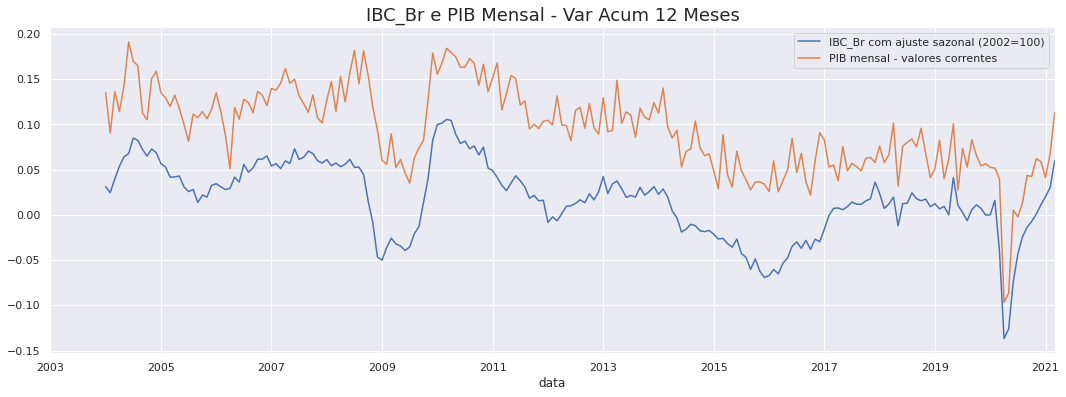

In [ ]:
pib.pct_change().rolling(12).sum().plot(figsize = (18,6))
plt.title('IBC_Br e PIB Mensal - Var Acum 12 Meses', fontsize = 18)

plt.show()

### PIB Trimestral - Demanda Agregada:

In [ ]:
url_pib = 'https://apisidra.ibge.gov.br/values/t/1621/n1/all/v/all/p/all/c11255/90687,90691,90696,90707,93404,93405,93406,93407,93408/d/v584%202'
# Tabela 1621 - Série encadeada do índice de volume trimestral com ajuste sazonal (Base: média 1995 = 100)

In [ ]:
PIB = pd.read_json(url_pib)
PIB = PIB[['D3C','D4N','V']]
PIB.columns = PIB.iloc[0]
PIB = PIB[1:]

PIB.set_index('Trimestre (Código)',inplace=True,drop=True)
PIB = PIB.pivot(columns = 'Setores e subsetores',values = 'Valor')

for v in PIB.columns:
 PIB[v] = pd.to_numeric(PIB[v])
datas = []

for data in PIB.index:
  datas.append(dt.datetime.strptime(data, '%Y%m').strftime('%Y/%m'))

PIB['Trimestre'] = datas
PIB['Trimestre'] = pd.to_datetime(PIB['Trimestre'],format='%Y/%m')
PIB.set_index('Trimestre',inplace=True,drop=True)

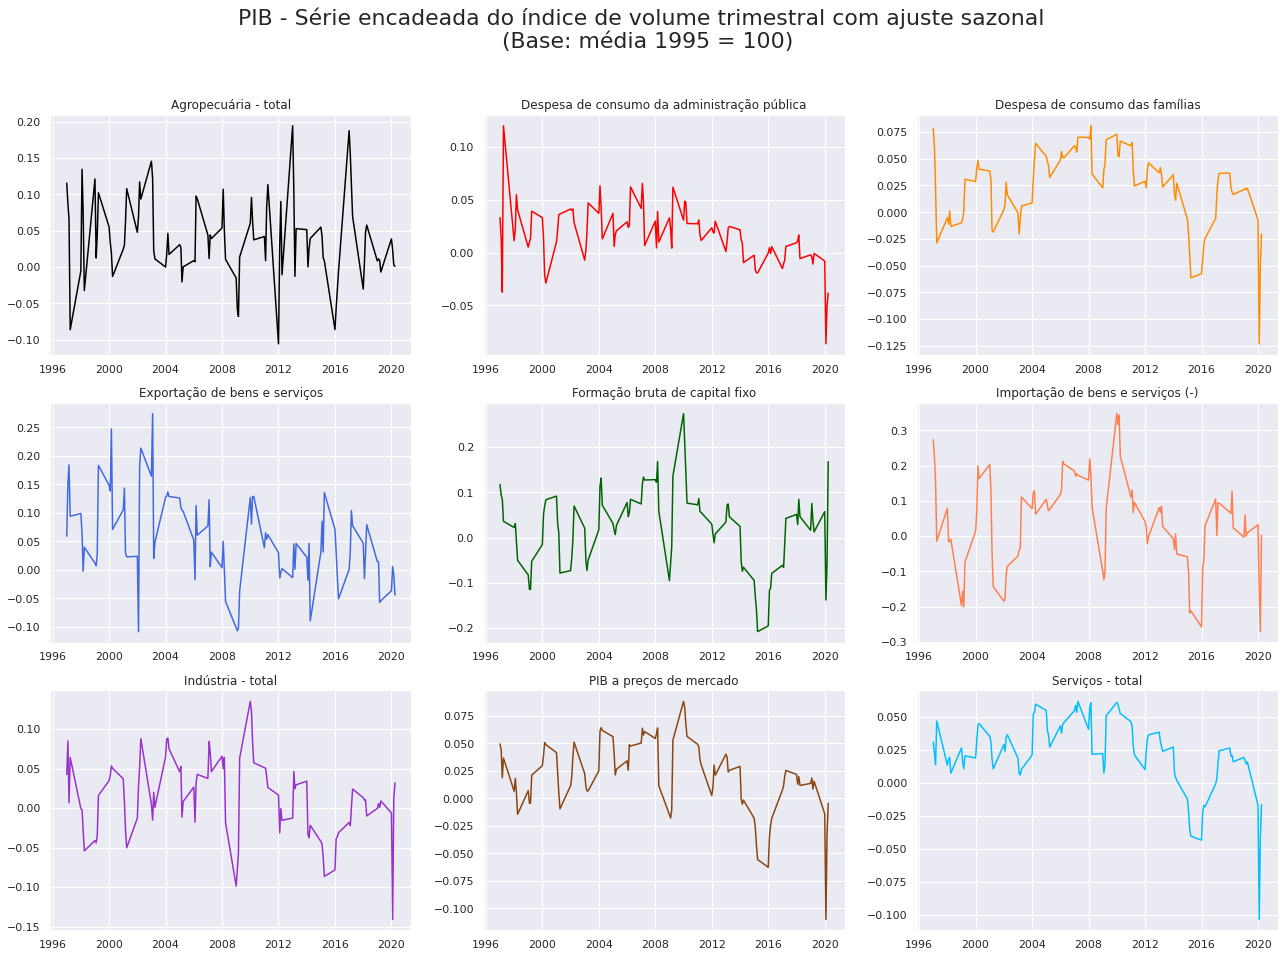

In [ ]:
f = plt.figure(figsize=(22,15))

plt.suptitle('PIB - Série encadeada do índice de volume trimestral com ajuste sazonal \n (Base: média 1995 = 100)',fontsize=22)
colors = ['black','red','darkorange','royalblue','darkgreen','coral','darkorchid','saddlebrown','deepskyblue','orangered']
for i,n in enumerate(PIB[PIB.columns]):
  f.add_subplot(3, 3, i+1)
  plt.plot(PIB[n].pct_change().rolling(4).sum(),color=colors[i]) 
  plt.title(n)
#plt.tight_layout()

plt.show()

### Índices de Confiança:

In [ ]:
codigos = [4393,7341,20339]
# Índice de Confiança do Consumidor
# Índice de Confiança do Empresário Industrial (ICEI) - Geral
# Sondagem de Serviços - Índice de Confiança de Serviços - Dessazonalizado

In [ ]:
confianca = pd.DataFrame()
for c in codigos:
  confianca[c] = bc_getdata(c)['valor']
confianca.columns = ['Confiança do Consumidor','Confiança do Empresário Industrial ','Confiança de Serviços']

In [ ]:
confianca.fillna(method='ffill',inplace=True)

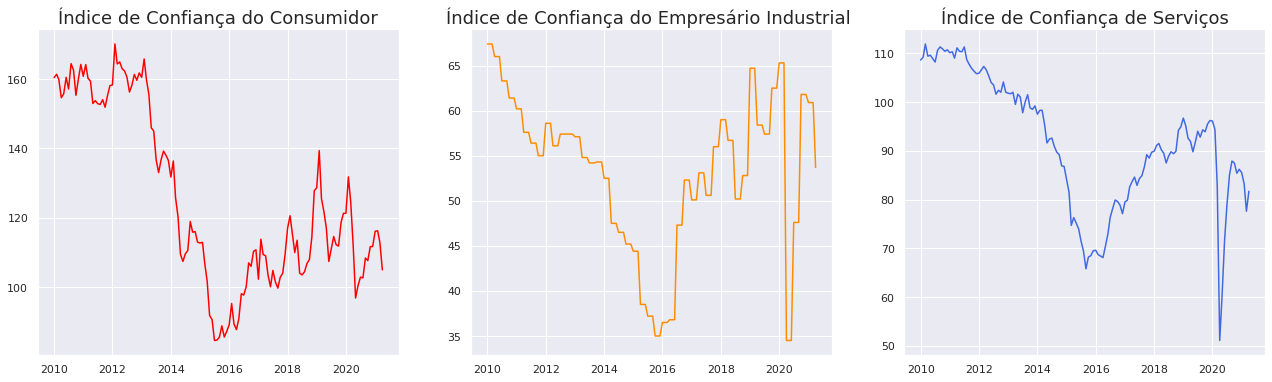

In [ ]:
f = plt.figure(figsize=(22,6))

colors = ['red','darkorange','royalblue']
for i,n in enumerate(confianca.columns):
  f.add_subplot(1, 3, i+1)
  plt.plot(confianca[confianca.index >= '2010'][n],color=colors[i]) 
  plt.title(f'Índice de {n}',fontsize=18)
#plt.tight_layout()

plt.show()

### Atividade Industrial

In [159]:
industria_link = 'https://apisidra.ibge.gov.br/values/t/3653/n1/all/v/3134/p/all/c544/129314,129315,129316/d/v3134%201'
# Tabela 3653 - Produção Física Industrial, por seções e atividades industriais

In [164]:
industria_prod = sidra_getdata(industria_link)
industria_prod.columns = ['Industria Geral', 'Industria Extrativa', 'Industria Transformação']

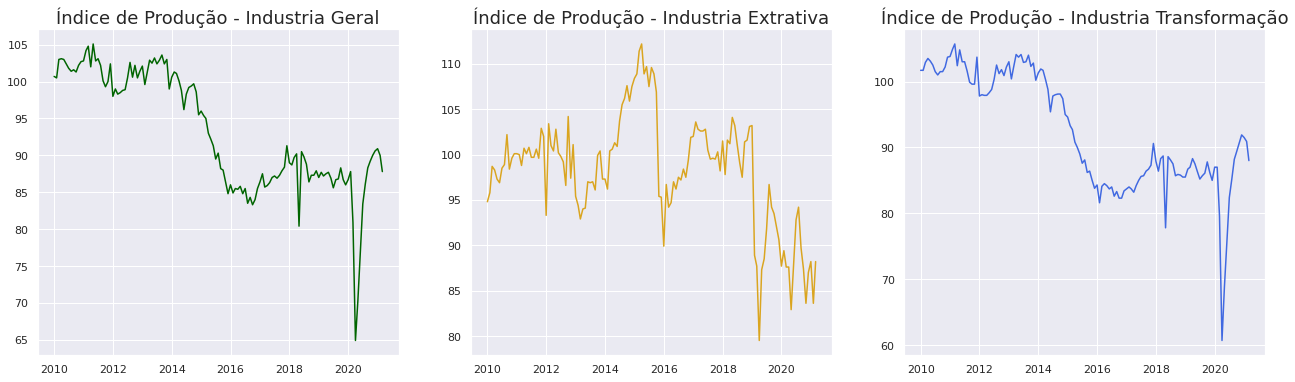

In [165]:
f = plt.figure(figsize=(22,6))

colors = ['darkgreen','goldenrod','royalblue']
for i,n in enumerate(industria_prod.columns):
  f.add_subplot(1, 3, i+1)
  plt.plot(industria_prod[industria_prod.index >= '2010'][n],color=colors[i]) 
  plt.title(f'Índice de Produção - {n}',fontsize=18)
#plt.tight_layout()

plt.show()

## Mercado de Trabalho:

### CAGED

In [ ]:
codigos = [28763,28764,28765,28766,28770,28771,28772]
          # 28763 - Novo Caged - Total
          # 28764 - Novo Caged - Agropecuária
          # 28765 - Novo Caged - Indústrias extrativas
          # 28766 - Novo Caged - Indústrias de transformação
          # 28770 - Novo Caged - Construção
          # 28771 - Novo Caged - Comércio
          # 28772 - Novo Caged - Serviços

In [ ]:
caged = pd.DataFrame()
for c in codigos:
  caged[c] = bc_getdata(c)['valor']
caged.columns = ['Total','Agropecuária','Indústrias extrativas',
                 'Indústrias de transformação','Construção','Comércio',
                 'Serviços']

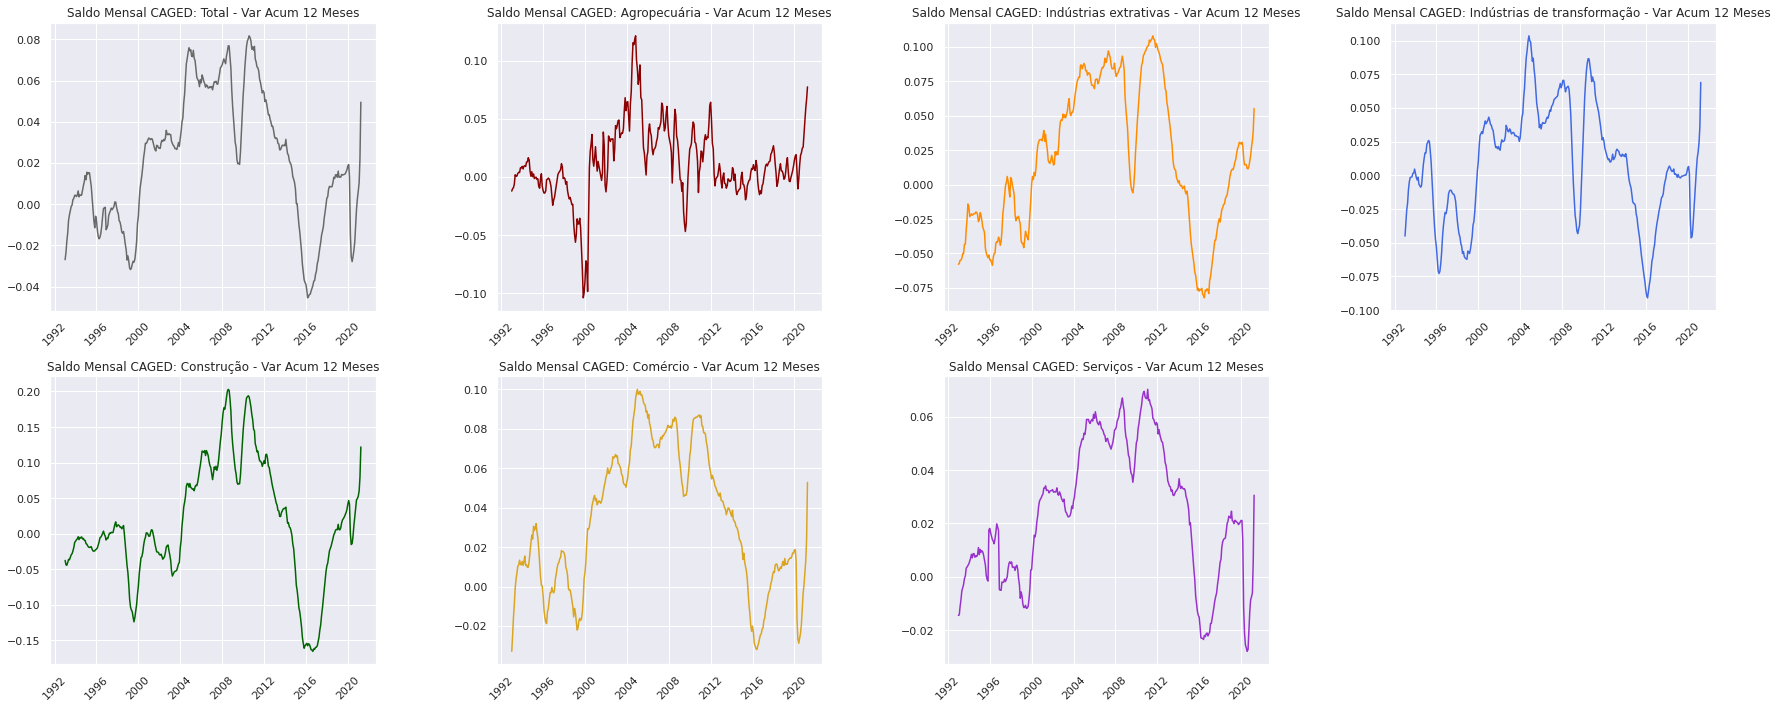

In [ ]:
f = plt.figure(figsize=(25,10))

colors = ['dimgrey','darkred','darkorange','royalblue','darkgreen','goldenrod','darkorchid']
for i,n in enumerate(caged.columns):
  f.add_subplot(2, 4, i+1)
  plt.plot(caged[n].pct_change().rolling(12).sum(),color=colors[i]) 
  plt.title(f'Saldo Mensal CAGED: {n} - Var Acum 12 Meses')
  plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
caged_prop = caged[['Agropecuária','Indústrias extrativas','Indústrias de transformação','Construção','Comércio','Serviços']].div(caged.Total, axis=0)

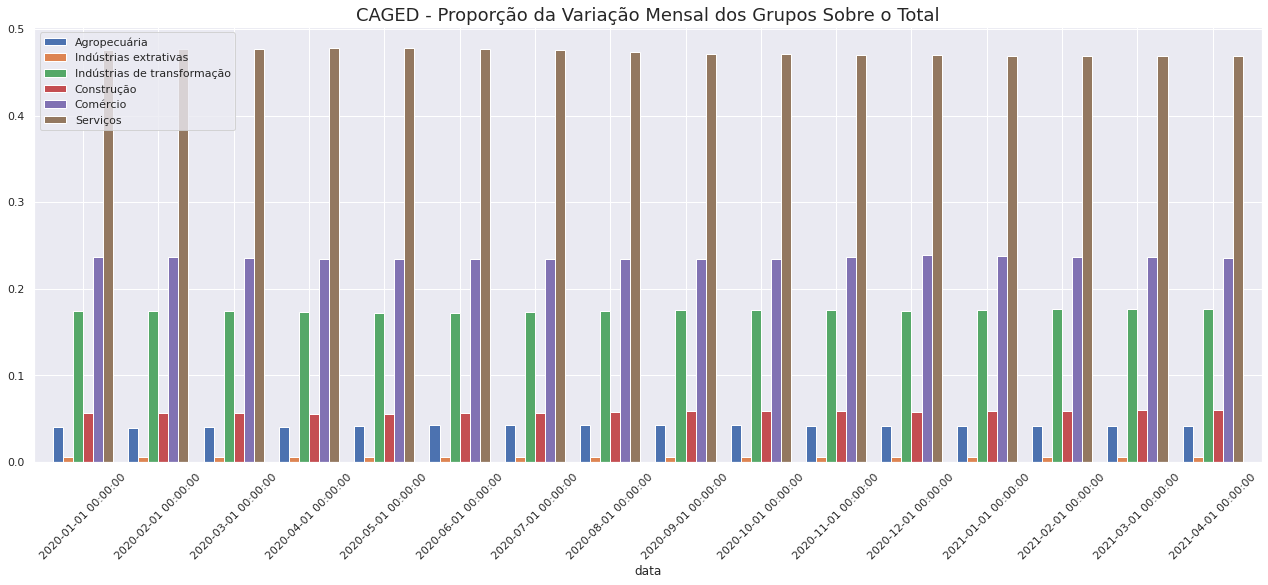

In [ ]:
caged_prop[caged_prop.index >= '2020'].plot.bar(figsize=(22,8),width = 0.8)
plt.title('CAGED - Proporção da Variação Mensal dos Grupos Sobre o Total',fontsize = 18)
plt.xticks(rotation = 45)

plt.show()

### CAGED x IBC-BR

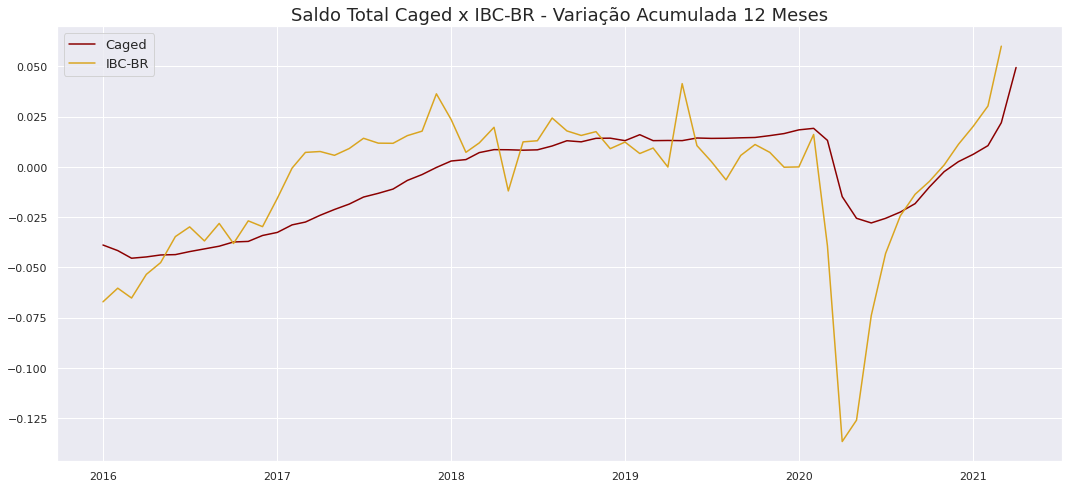

In [ ]:
plt.figure(figsize = (18,8))

plt.plot(caged[caged.index >= '2015']['Total'].pct_change().rolling(12).sum(), label = 'Caged', color = 'darkred')
plt.plot(pib[pib.index >='2015']['IBC_Br com ajuste sazonal (2002=100)'].pct_change().rolling(12).sum(), label = 'IBC-BR', color = 'goldenrod')
plt.legend(fontsize = 13)
plt.title('Saldo Total Caged x IBC-BR - Variação Acumulada 12 Meses',fontsize = 18)

plt.show()

### PNAD

In [ ]:
url_pnad = 'https://apisidra.ibge.gov.br/values/t/6381/n1/all/v/4099/p/all/d/v4099%201'
# Tabela 6381 - Taxa de desocupação, na semana de referência, das pessoas de 14 anos ou mais de idade - Total, 
# coeficiente de variação, variações em relação aos três trimestres móveis anteriores e ao mesmo trimestre móvel do ano anterior, e média anual.

In [ ]:
pnad = pd.read_json(url_pnad)
pnad = pnad[['D3C', 'V']]
pnad.columns = ['Mês', 'Valor']
pnad = pnad[1:]
pnad['Mês'] = pd.to_datetime(pnad['Mês'], format = '%Y%m')
pnad.set_index('Mês', drop = True, inplace= True)
pnad['Valor'] = pnad['Valor'].astype(float)
pnad.columns = ['PNAD - Taxa Desocupação']

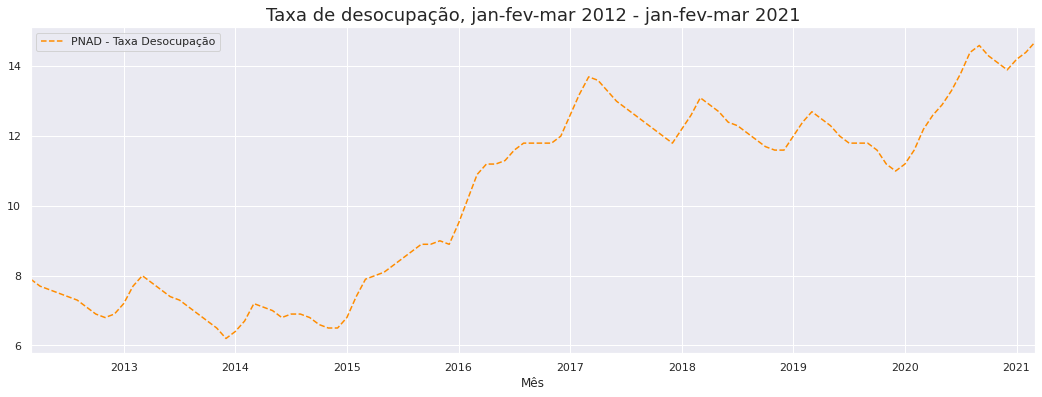

In [ ]:
pnad.plot(figsize = (18,6), ls = '--', color = 'darkorange')
plt.title('Taxa de desocupação, jan-fev-mar 2012 - jan-fev-mar 2021', fontsize = 18)

plt.show()

### PNAD vs CAGED

In [ ]:
url_pnadcart = 'https://apisidra.ibge.gov.br/values/t/6320/n1/all/v/4090/p/all/c11913/96165'

In [ ]:
pnad_cart = pd.read_json(url_pnadcart)
pnad_cart = pnad_cart[['D3C', 'V']]
pnad_cart.columns = ['Mês', 'Valor']
pnad_cart = pnad_cart[1:]
pnad_cart['Mês'] = pd.to_datetime(pnad_cart['Mês'], format = '%Y%m')
pnad_cart.set_index('Mês', drop = True, inplace= True)
pnad_cart['Valor'] = pnad_cart['Valor'].astype(float)
pnad_cart.columns = ['PNAD - População Ocupada']

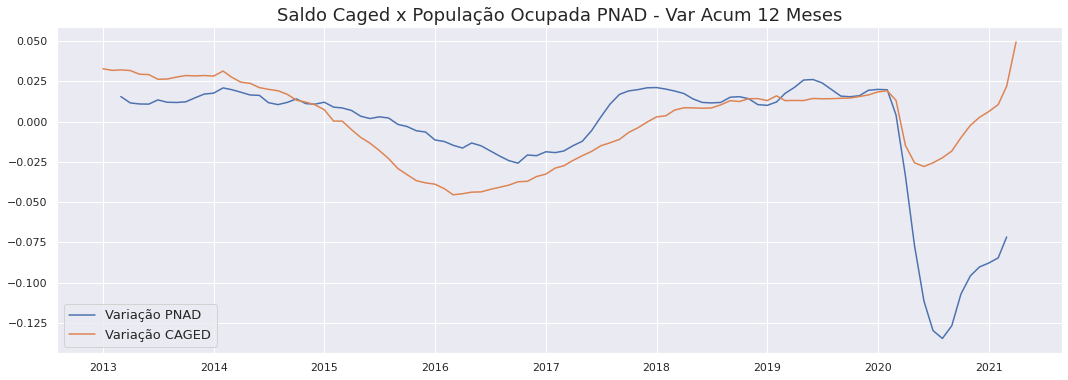

In [ ]:
plt.figure(figsize = (18,6))

plt.plot(pnad_cart.pct_change().rolling(12).sum(), label = 'Variação PNAD')
plt.plot(caged[caged.index >= '2012']['Total'].pct_change().rolling(12).sum(), label = 'Variação CAGED')

plt.title('Saldo Caged x População Ocupada PNAD - Var Acum 12 Meses', fontsize = 18)
plt.legend(fontsize = 13)

plt.show()

## Nível de Preços

### IPCA:

In [ ]:
ipca_15 = bc_getdata(7478)
ipca_15.columns = ['IPCA_15']

#### Variação Mensal:

In [ ]:
url_ipca = 'https://apisidra.ibge.gov.br/values/t/7061/n1/all/v/306/p/all/c315/7169,7170,7445,7486,7558,7625,7660,7712,7766,7786/d/v306%202'

In [ ]:
ipca = pd.read_json(url_ipca)
ipca = ipca[['D3C','D4N','V']]
ipca.columns = ['Mês','Var','Valor']
ipca = ipca[1:]

In [ ]:
ipca['Mês'] = pd.to_datetime(ipca['Mês'],format='%Y%m')
ipca.set_index('Mês',drop=True,inplace=True)
ipca['Valor'] = ipca['Valor'].astype(float)
ipca = ipca.pivot(columns='Var',values='Valor')

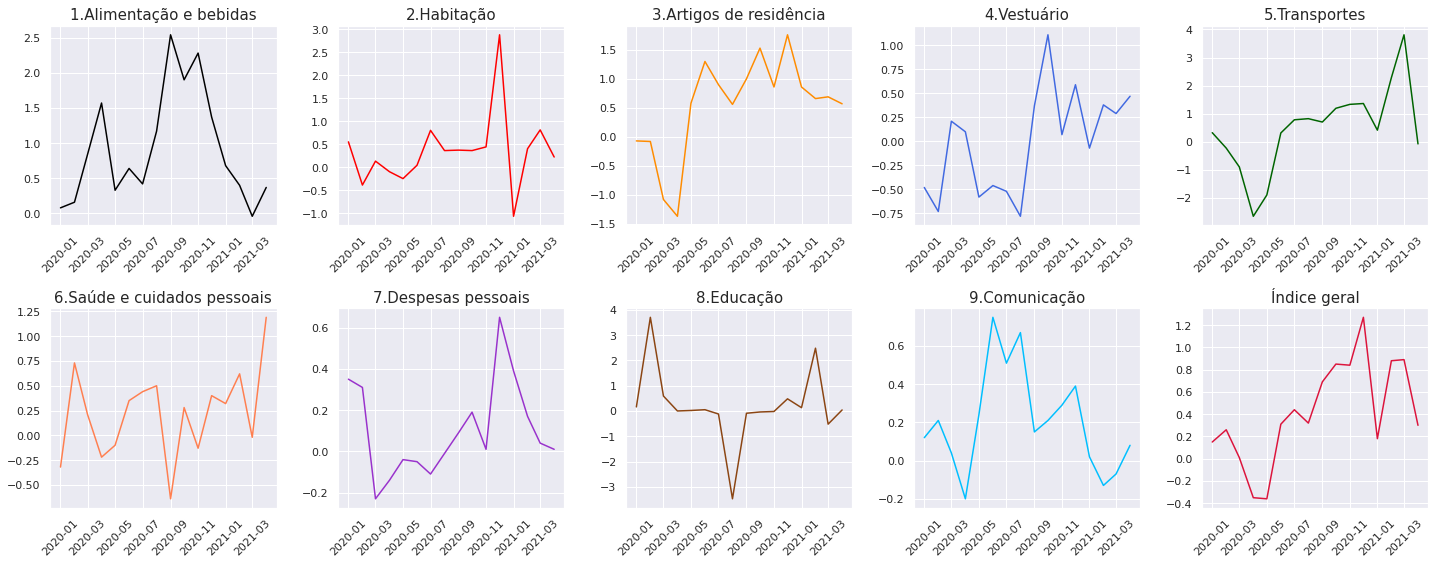

In [ ]:
f = plt.figure(figsize=(20,8))

#f.suptitle('Variação Mensal dos Componentes do IPCA', fontsize=16)
colors = ['black','red','darkorange','royalblue','darkgreen','coral','darkorchid','saddlebrown','deepskyblue','crimson']
for i,n in enumerate(ipca.columns):
  f.add_subplot(2, 5, i+1)
  plt.plot(ipca[n],color=colors[i]) 
  plt.title(n,fontsize=15)
  plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Variação Pesos:

In [ ]:
url_pesos = 'https://apisidra.ibge.gov.br/values/t/7061/n1/all/v/309/p/all/c315/7169,7170,7445,7486,7558,7625,7660,7712,7766,7786/d/v309%204'

In [ ]:
ipca_pesos = pd.read_json(url_pesos)
ipca_pesos = ipca_pesos[['D3C','D4N','V']]
ipca_pesos.columns = ['Mês','Var','Valor']
ipca_pesos = ipca_pesos[1:]

In [ ]:
ipca_pesos['Mês'] = pd.to_datetime(ipca_pesos['Mês'],format='%Y%m')
ipca_pesos.set_index('Mês',drop=True,inplace=True)
ipca_pesos['Valor'] = ipca_pesos['Valor'].astype(float)
ipca_pesos = ipca_pesos.pivot(columns='Var',values='Valor')

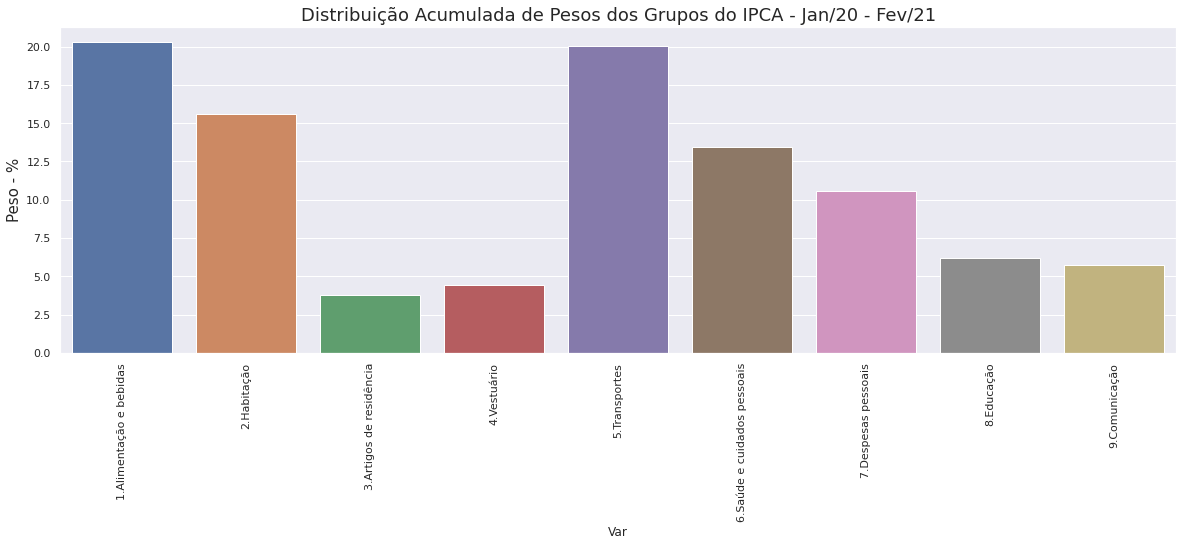

In [ ]:
plt.figure(figsize = (20,6))

sns.barplot(x = ipca_pesos.columns[0:-1],y = ipca_pesos.iloc[:,0:-1].sum()/len(ipca_pesos.index))
plt.title('Distribuição Acumulada de Pesos dos Grupos do IPCA - Jan/20 - Fev/21',fontsize=18)
plt.ylabel('Peso - %',fontsize=15)
plt.xticks(rotation=90)

plt.show()

#### Variação Mensal (Classificações BACEN):

In [ ]:
codigos = [4447,4448,4449,10841,10842,10843,10844,11428]

In [ ]:
ipca_classesbc = pd.DataFrame()
for c in codigos:
  ipca_classesbc[c] = bc_getdata(c)['valor']
  ipca_classesbc = ipca_classesbc[ipca_classesbc.index >= '2010-01-01 00:00:00']

ipca_classesbc.columns = ['Comercializáveis','Não Comercializáveis','Monitorados',
                         'Bens não-duráveis','Bens semi-duráveis','Duráveis',
                         'Serviços','Itens Livres']

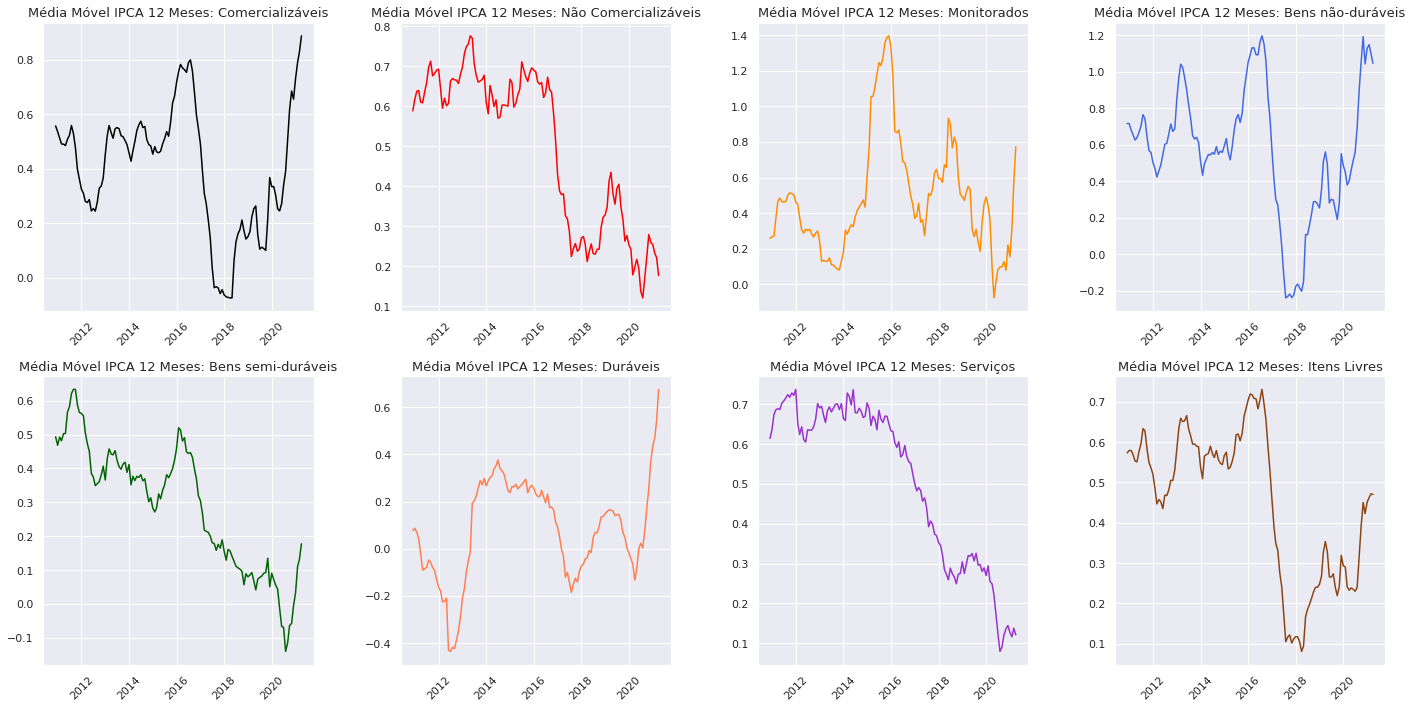

In [ ]:
f = plt.figure(figsize=(20,10))

colors = ['black','red','darkorange','royalblue','darkgreen','coral','darkorchid','saddlebrown','deepskyblue','crimson']
for i,n in enumerate(ipca_classesbc.columns):
  fitem = f.add_subplot(2, 4, i+1)
  plt.plot(ipca_classesbc[n].rolling(12).mean(),color=colors[i]) 
  plt.title('Média Móvel IPCA 12 Meses: '+n,fontsize=13)
  plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### IGPM

#### Comparação IGPM x IPCA:

In [ ]:
codigos = [189,7450,7453,7456]
# 189  - Índice geral de preços do mercado (IGP-M)
# 7450 - Índice de Preços por Atacado-Mercado (IPA-M)
# 7453 - Índice de Preços ao Consumidor-Mercado (IPC-M)
# 7456 - Índice Nacional de Custo da Construção-Mercado (INCC-M)

In [ ]:
igpm = pd.DataFrame()
for c in codigos:
  igpm[c] = bc_getdata(c)['valor']
igpm = igpm[igpm.index >= '2000-01-01 00:00:00']
igpm.columns = ['IGP-M','IPA-M','IPC-M','INCC-M']

In [ ]:
url_serieipca = 'https://apisidra.ibge.gov.br/values/t/118/n1/all/v/all/p/all/d/v306%202'

In [ ]:
ipca_serie = pd.read_json(url_serieipca)
ipca_serie = ipca_serie[['D3C','V']]
ipca_serie.columns = ['Mês','Valor']
ipca_serie = ipca_serie[1:]

In [ ]:
ipca_serie['Mês'] = pd.to_datetime(ipca_serie['Mês'],format='%Y%m')
ipca_serie.set_index('Mês',drop=True,inplace=True)
ipca_serie['Valor'] = ipca_serie['Valor'].astype(float)

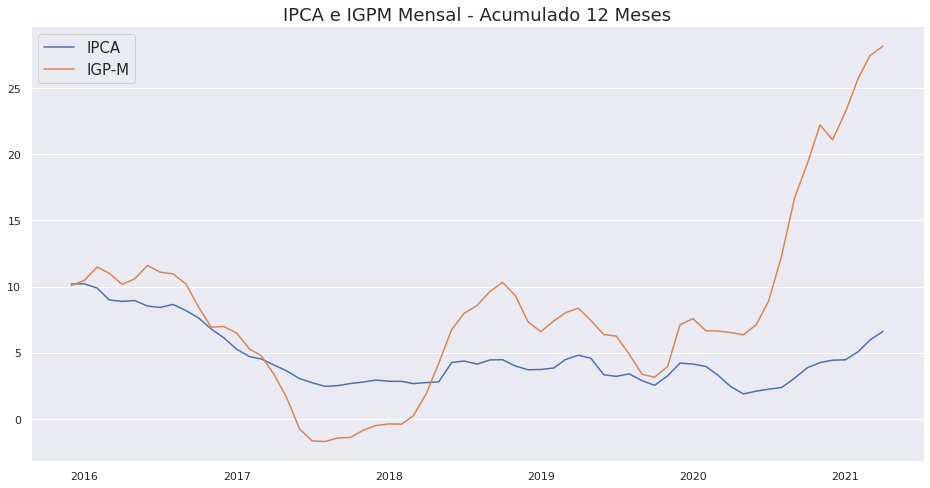

In [ ]:
plt.figure(figsize = (16,8))

plt.plot(ipca_serie[ipca_serie.index >= '2015'].rolling(12).sum(), label = 'IPCA')
plt.plot(igpm[igpm.index >= '2015']['IGP-M'].rolling(12).sum(), label = 'IGP-M')
plt.grid(axis = 'x')

plt.title('IPCA e IGPM Mensal - Acumulado 12 Meses', fontsize = 18)
plt.legend(fontsize = 15)

plt.show()

#### Desagregando Variação dos Componentes:

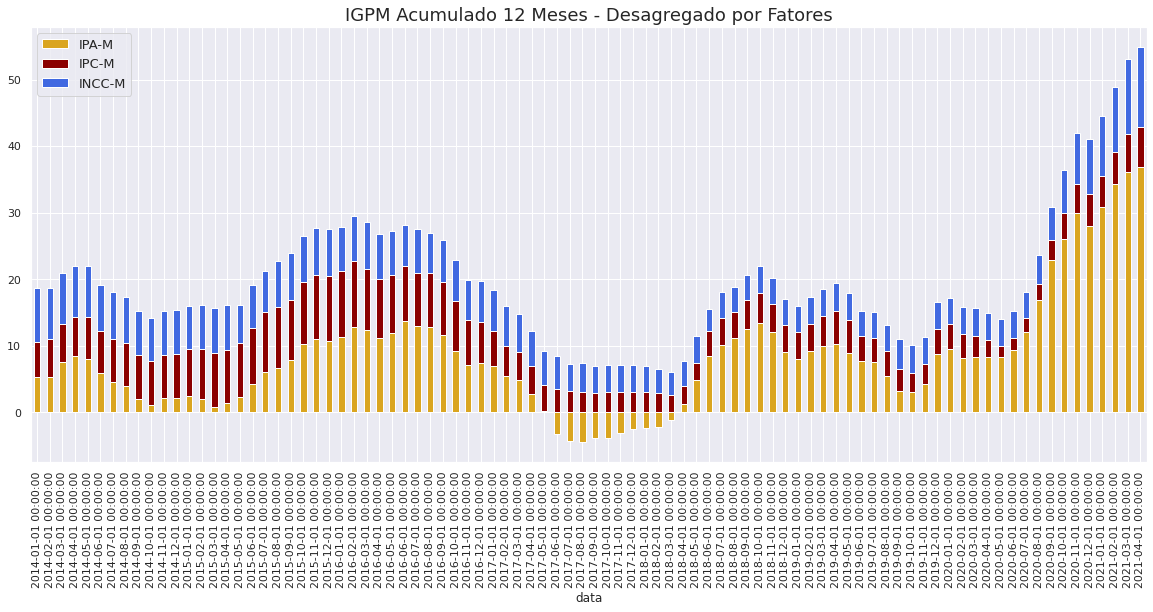

In [ ]:
igpm.loc[:,'IPA-M':].rolling(12).sum()[igpm.index >= '2014'].plot.bar(stacked=True, 
                                                                      figsize = (20,8), 
                                                                      color = ['goldenrod','darkred','royalblue'])
plt.title('IGPM Acumulado 12 Meses - Desagregado por Fatores', fontsize = 18)
plt.legend(fontsize = 13)

plt.show()

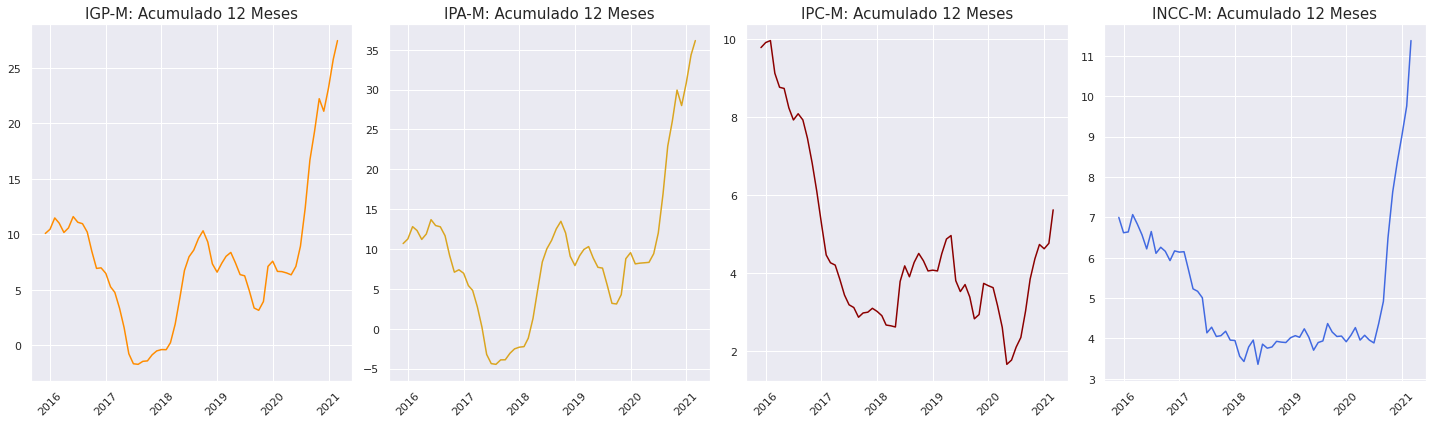

In [ ]:
f = plt.figure(figsize=(20,6))
colors = ['darkorange','goldenrod','darkred','royalblue']
for i,n in enumerate(igpm.columns):
  f.add_subplot(1, 4, i+1)
  plt.plot(igpm[igpm.index >= '2015'][n].rolling(12).sum(),color=colors[i]) 
  plt.title(f'{n}: Acumulado 12 Meses',fontsize=15)
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### IC-Br

In [ ]:
codigos = [27574, 27575, 27576, 27577]
# 27574 - IC-Br
# 27575 - IC-Br Agropecuária
# 27576 - IC-Br Metais
# 27577 - IC-Br Energia

In [ ]:
ic_br = pd.DataFrame()
for c in codigos:
  ic_br[c] = bc_getdata(c)['valor']
ic_br.columns = ['IC_Br Total', ' IC_Br Agropecuária', 'IC_Br Metais', 'IC_Br Energia']

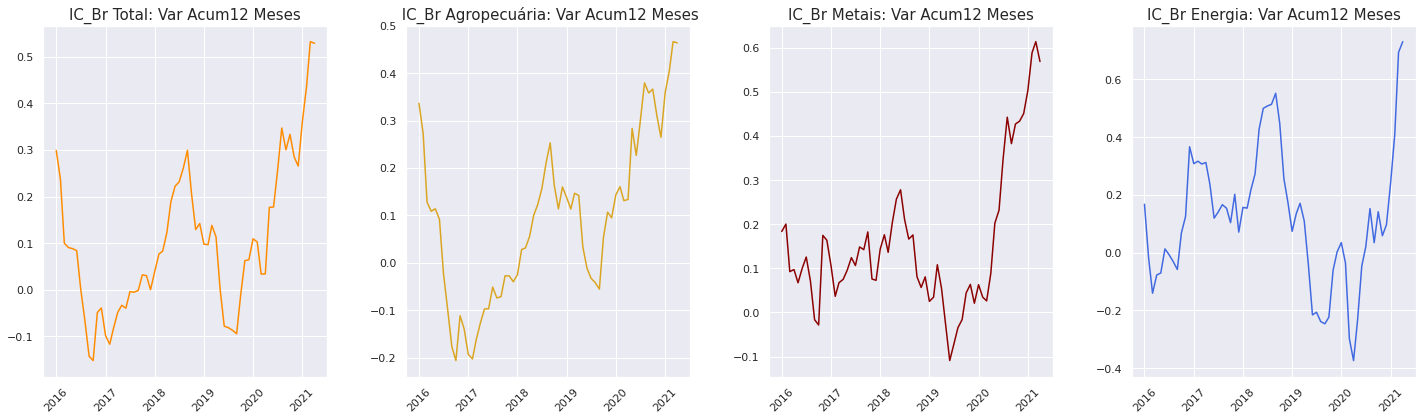

In [ ]:
f = plt.figure(figsize=(20,6))
colors = ['darkorange','goldenrod','darkred','royalblue']
for i,n in enumerate(ic_br.columns):
  f.add_subplot(1, 4, i+1)
  plt.plot(ic_br[ic_br.index >= '2015'][n].pct_change().rolling(12).sum(),color=colors[i]) 
  plt.title(f'{n}: Var Acum12 Meses',fontsize=15)
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Indicadores Monetários e de Créditos

### Selic, Juros Futuros

In [ ]:
selic = bc_getdata(432)
selic.columns = ['Selic Meta']
# Selic Meta

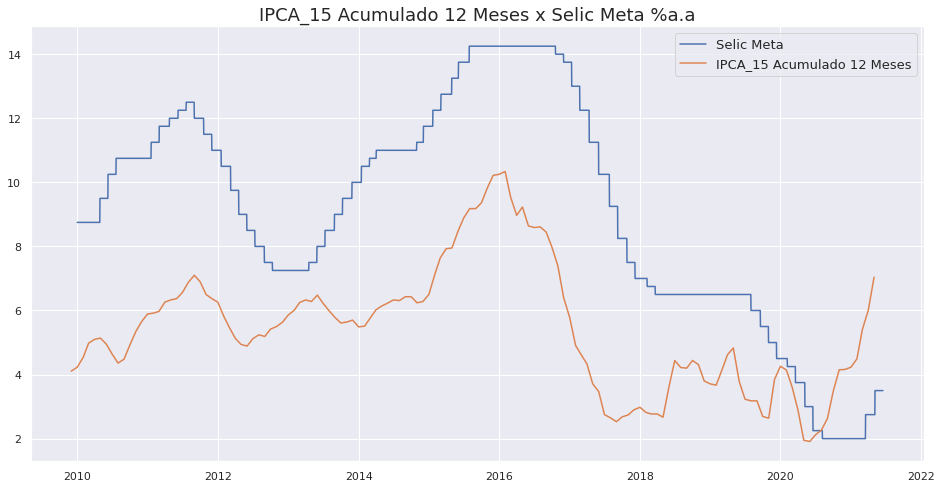

In [ ]:
plt.figure(figsize = (16,8))

plt.plot(selic[selic.index >= '2010'], label = 'Selic Meta')
plt.plot(ipca_15[ipca_15.index >= '2009'].rolling(12).sum(), label = 'IPCA_15 Acumulado 12 Meses')
plt.title('IPCA_15 Acumulado 12 Meses x Selic Meta %a.a', fontsize = 18)
plt.legend(fontsize = 13)

plt.show()

### Curva de Juros Fechamento - Ambima 

In [75]:
# fonte: https://www.anbima.com.br/pt_br/informar/curvas-de-juros-fechamento.htm
taxas = pd.read_csv('/content/CurvaAmbima.csv',sep=';',encoding='latin 1')

In [76]:
taxas.drop(columns=['Beta 4','Lambda 1','Lambda 2'],inplace=True)
taxas = taxas[4:22]
taxas.reset_index(drop=True,inplace=True)
taxas.columns = ['Vertices','ETTJ IPCA','ETTJ PREF','Inflação Implícita']

In [77]:
taxas['ETTJ IPCA'] = [i.replace(',', '.') for i in taxas['ETTJ IPCA']]
taxas['ETTJ PREF'] = [x.replace(',', '.') for x in taxas['ETTJ PREF']]
taxas['Inflação Implícita'] = [x.replace(',', '.') for x in taxas['Inflação Implícita']]

In [78]:
taxas['ETTJ IPCA'] = taxas['ETTJ IPCA'].astype(float)
taxas['ETTJ PREF'] = taxas['ETTJ PREF'].astype(float)
taxas['Inflação Implícita'] = taxas['Inflação Implícita'].astype(float)

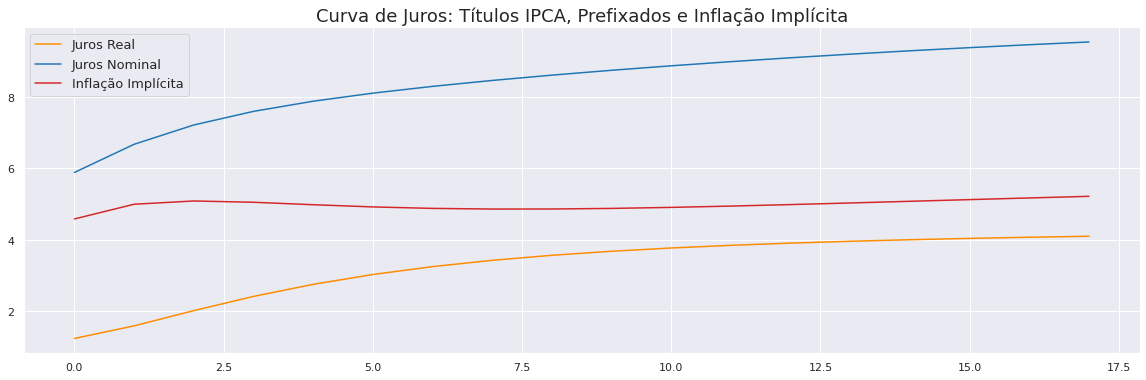

In [81]:
plt.figure(figsize=(20,6))
plt.plot(taxas['ETTJ IPCA'],label='Juros Real',color='darkorange')
plt.plot(taxas['ETTJ PREF'],label='Juros Nominal',color='tab:blue')
plt.plot(taxas['Inflação Implícita'],label='Inflação Implícita',color='tab:red')
plt.title('Curva de Juros: Títulos IPCA, Prefixados e Inflação Implícita',fontsize=18)

plt.legend(fontsize = 13)
plt.show()

### Indicadores de Crédito

In [82]:
codigos = [20539, 20540, 20541, 20542, 20593]
# 20539 - Saldo Total da Carteira de Crédito
# 20540 - Saldo da Carteira de Crédito PJ
# 20541 - Saldo da Carteira de Crédito PF
# 20542 - Saldo da Carteira de Crédito Recursos Livres
# 20593 - Saldo da Carteira de Crédito Recursos Direcionados

In [85]:
credito = pd.DataFrame()
for c in codigos:
  credito[c] = bc_getdata(c)['valor']
credito.columns = ['Saldo Total de Crédito', 'Saldo Total de Crédito - PJ', 'Saldo Total de Crédito - PF', 
                   'Saldo Total de Crédito - Recursos Livres', 'Saldo Total de Crédito - Recursos Direcionados']

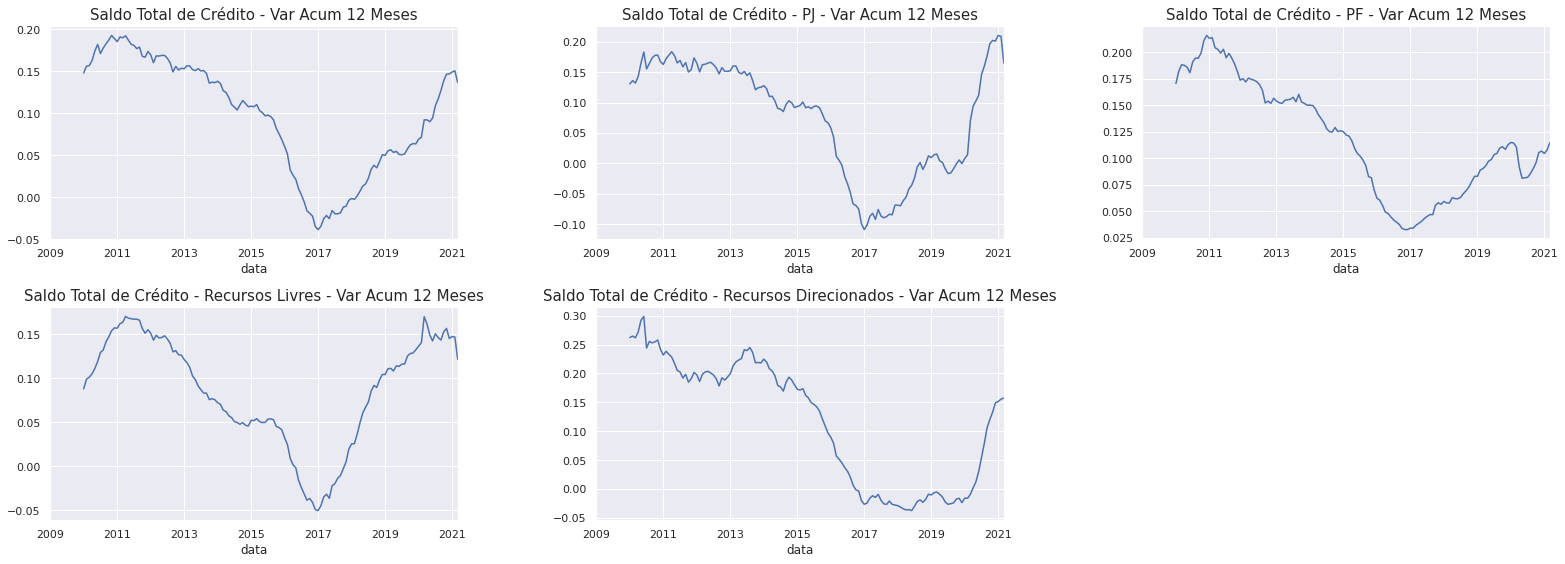

In [92]:
f = plt.figure(figsize = (22,8))
for i, n in enumerate(credito.columns):
  f.add_subplot(2, 3, i+1)
  credito[credito.index >= '2009'][n].pct_change().rolling(12).sum().plot()
  plt.title(n+' - Var Acum 12 Meses', fontsize = 15)
plt.tight_layout()

plt.show()

In [93]:
codigos = [20622, 20623, 20624, 20625, 20626]
#20622 - Saldo Total da Carteira de Crédito / PIB
#20623 - Saldo da Carteira de Crédito PJ / PIB
#20624 - Saldo da Carteira de Crédito PF / PIB
#20625 - Saldo da Carteira de Crédito Recursos Livres / PIB
#20626 - Saldo da Carteira de Crédito Recursos Direcionados / PIB

In [98]:
credito_pib = pd.DataFrame()
for c in codigos: 
  credito_pib[c] = bc_getdata(c)['valor']
credito_pib.columns = ['Saldo Total Crédito/PIB', 'Saldo Total Crédito/PIB - PJ', 'Saldo Total Crédito/PIB - PF', 
                   'Saldo Total Crédito/PIB - Recursos Livres', 'Saldo Total Crédito/PIB - Recursos Direcionados']

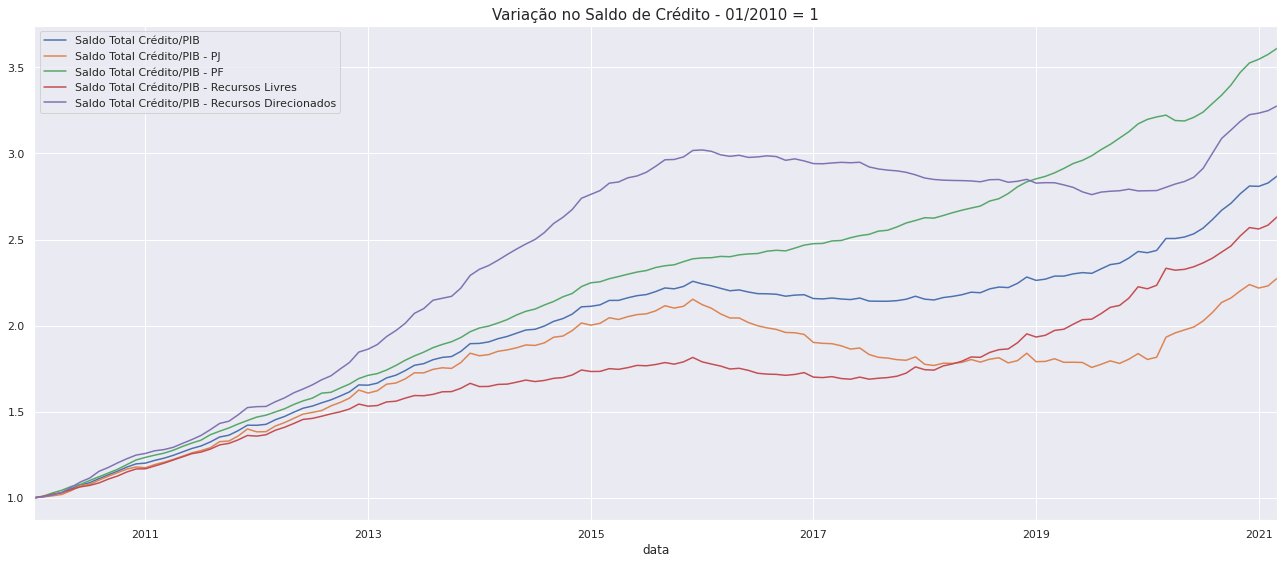

In [116]:
(credito_pib[credito_pib.index >= '2010']/credito_pib[credito_pib.index >= '2010'].iloc[0]).plot(figsize = (18,8))
plt.title('Variação no Saldo de Crédito - 01/2010 = 1', fontsize = 15)
plt.tight_layout()

plt.show()

## Setor Externo

### Câmbio

In [117]:
# Países emergentes : Ao todo, são 151 países classificados nestas condições, segundo o FMI (Fundo Monetário Internacional).
# Países considerados na análise: 16 países que representam 76,7% do PIB (Produto Interno Bruto) do grupo de emergentes. 
# China - Iuan: CNY
# Russia - Rublo: RUB
# Índia - Rúpia: INR
# Indonésia - Rúpia: IDR
# México - Peso: MXN
# Arábia Saudita - Rial: SAR
# Polônia - Zlóti: PLN
# Tailândia - Baht: THB
# Filipinas - Peso: PHP
# Malásia - Ringuite: MYR
# Bangladesh - Taka: BDT
# África do Sul - Rand: ZAR
# Colômbia - Peso: COP
# Romênia - Leu: RON
# Chile - Peso: CLP
# Peru - Novo sol: PEN

In [118]:
moedas = ['CNYUSD=X','RUBUSD=X','INRUSD=X','IDRUSD=X',
          'MXNUSD=X','SARUSD=X','PLNUSD=X','THBUSD=X',
          'PHPUSD=X', 'MYRUSD=X','BDTUSD=X','ZARUSD=X',
          'COPUSD=X','RONUSD=X','CLPUSD=X','PENUSD=X']
          # Cesta de 16 que Agregam a Maior Contribuição ao PIB total dos Emergentes
          # China
          # Russia
          # Índia
          # Indonésia
          # México  
          # Arábia Saudita
          # Polônia 
          # Tailândia
          # Filipinas
          # Malásia 
          # Banglades
          # África do
          # Colômbia 
          # Romênia 
          # Chile 
          # Peru 

In [119]:
cesta_emerg = web.DataReader(moedas,'yahoo','2018-01-01','2021-05-28')['Adj Close']
cesta_emerg = cesta_emerg.fillna(method='ffill')

In [120]:
indice_emerg = (cesta_emerg.sum(axis=1)/cesta_emerg.iloc[0].sum())*100

In [121]:
dolar_real = bc_getdata(1)

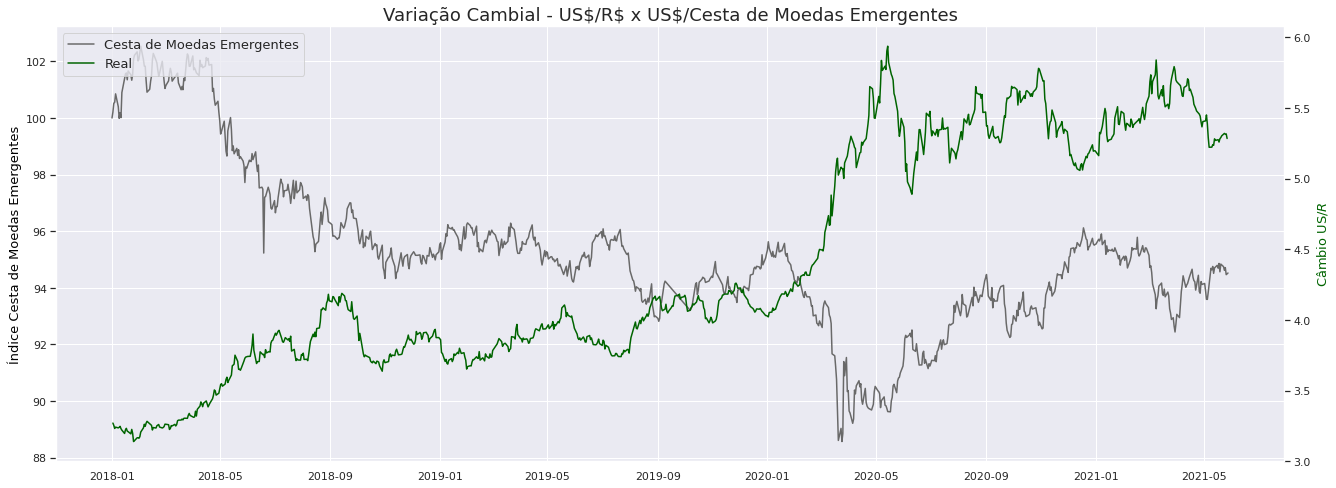

In [123]:
figure,axis_1 = plt.subplots(figsize=(22,8))
axis_1.plot(indice_emerg,color='dimgrey',label='Cesta de Moedas Emergentes')
axis_1.set_ylabel('Índice Cesta de Moedas Emergentes',color = 'black',fontsize=13)

axis_2 = axis_1.twinx()
axis_2.plot(dolar_real[dolar_real.index >= '2018'],color='darkgreen',label='Real')
axis_2.set_ylabel('Câmbio US$/R$',color = 'darkgreen',fontsize=13)
axis_2.grid(b=None)

lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2

axis_1.legend(lines, labels,loc='upper left',fontsize=13)
plt.title('Variação Cambial - US$/R$ x US$/Cesta de Moedas Emergentes',fontsize = 18)

plt.show()

### Balanço de Pagamentos

In [129]:
codigos_bpcomercial = [22704, 22705, 22706]
# 22704 : Balança comercial e Serviços - mensal - saldo
# 22705 : Balança comercial e Serviços - mensal - receita
# 22706 : Balança comercial e Serviços - mensal - despesa

In [125]:
codigos_bptcorrentes = [22701, 22702, 22703]
# 22704 : Transações correntes - mensal - saldo
# 22705 : Transações correntes - mensal - receita
# 22706 : Transações correntes - mensal - despesa

In [126]:
codigos_bpfin = [22864, 22885, 22886, 22887]
# 22864 - Investimentos Diretos - Saldo Líquido Total
# 22885 - Investimentos diretos no país - Saldo Líquido
# 22886 - Investimentos diretos no país - Ingressos
# 22887 - Investimentos diretos no país - Saídas

In [130]:
balanco_comercial = pd.DataFrame()
for codigo in codigos_bpcomercial:
    balanco_comercial[codigo] = bc_getdata(codigo)['valor']
balanco_comercial.columns = ['Saldo','Receita','Despesa']

In [131]:
bp_tcorrentes = pd.DataFrame()
for codigo in codigos_bptcorrentes:
    bp_tcorrentes[codigo] = bc_getdata(codigo)['valor']
bp_tcorrentes.columns = ['Saldo','Receita','Despesa']

In [133]:
bp_invest = pd.DataFrame()
for codigo in codigos_bpfin:
    bp_invest[codigo] = bc_getdata(codigo)['valor']
bp_invest.columns = ['Investimentos Diretos - Saldo Total','Investimentos Diretos no País - Saldo',
                     'Investimentos Diretos no País - Ingressos', 'Investimentos Diretos no País - Saídas']

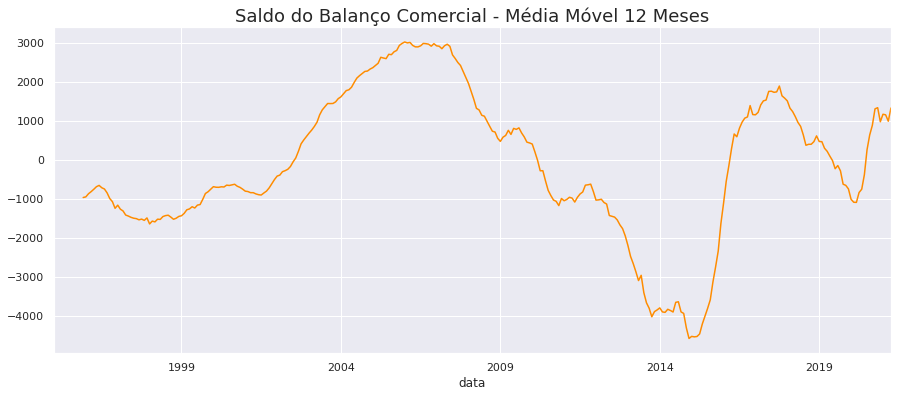

In [135]:
balanco_comercial['Saldo'].rolling(12).mean().plot(figsize = (15,6), color = 'darkorange')
plt.title('Saldo do Balanço Comercial - Média Móvel 12 Meses',fontsize = 18)

plt.show()

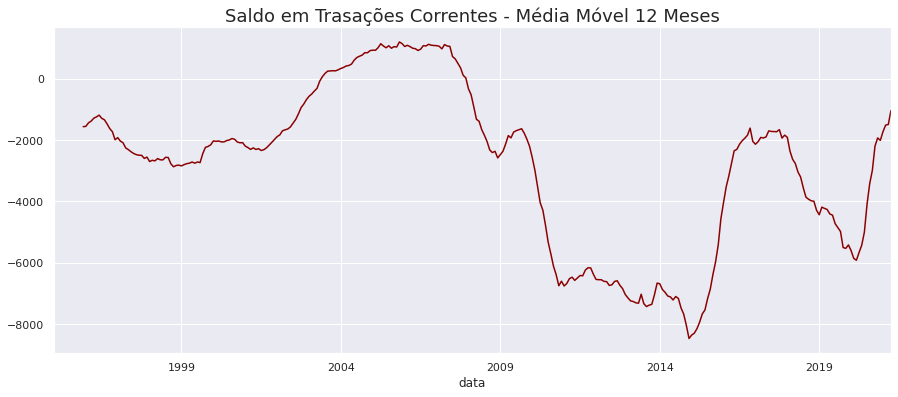

In [136]:
bp_tcorrentes['Saldo'].rolling(12).mean().plot(figsize = (15,6), color = 'darkred')
plt.title('Saldo em Trasações Correntes - Média Móvel 12 Meses',fontsize = 18)

plt.show()

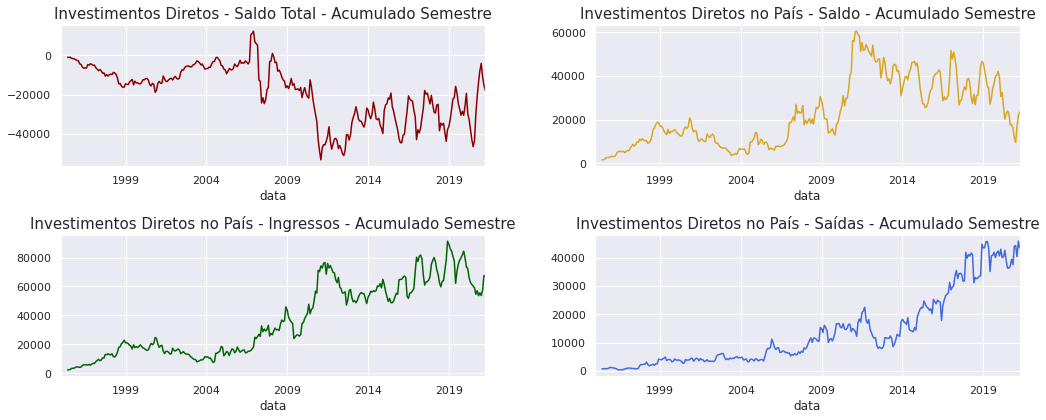

In [137]:
f = plt.figure(figsize = (15,6))
colors = ['darkred', 'goldenrod', 'darkgreen', 'royalblue']

for i, name in enumerate(bp_invest.columns):
    f.add_subplot(2, 2, i+1)
    bp_invest[name].rolling(6).sum().plot(color = colors[i])
    plt.title(f'{name} - Acumulado Semestre', fontsize = 15)
plt.tight_layout()

plt.show()

## Economia Internacional

### Juros e Inflação EUA

In [155]:
cpi = web.DataReader('CPALTT01USM657N', data_source = 'fred', start = '2000')
cpi.columns = ['Valor']

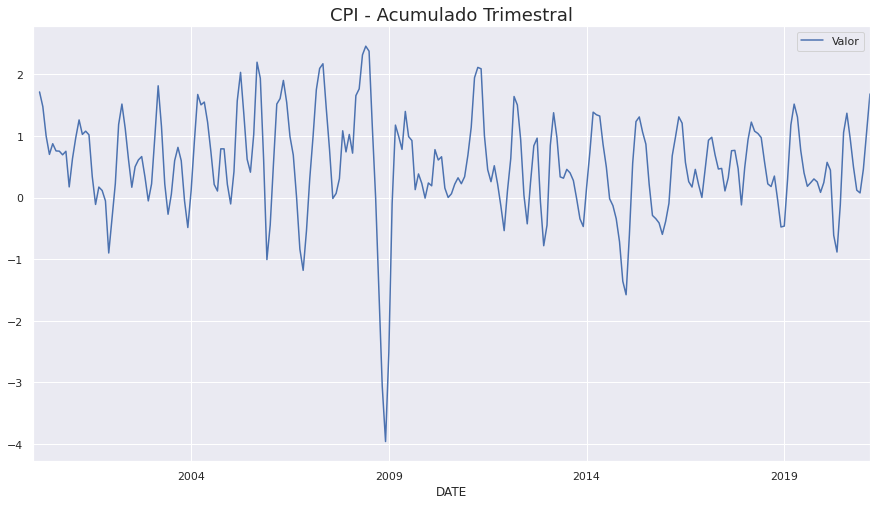

In [156]:
cpi.rolling(3).sum().plot(figsize = (15,8))
plt.title('CPI - Acumulado Trimestral', fontsize = 18)

plt.show()

In [157]:
# DGS10 - 10-Year Treasury Constant Maturity Rate
# DFF - Effective Federal Funds Rate
fed_irate = web.DataReader(['DFF','DGS10'], data_source = 'fred', start = '2000')
fed_irate.columns = ['Effective Fed Funds Rate', '10y Treasury']

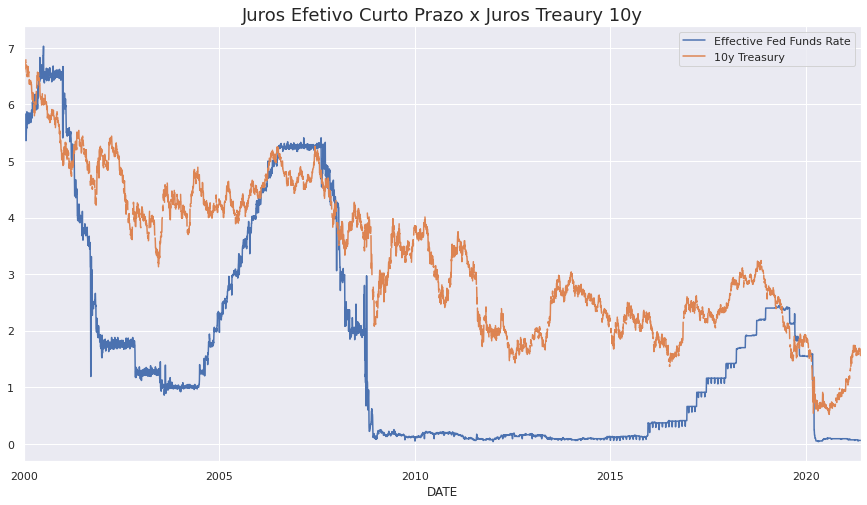

In [158]:
fed_irate.plot(figsize = (15,8))
plt.title('Juros Efetivo Curto Prazo x Juros Treaury 10y', fontsize = 18)
plt.show()

### Projeções FMI

In [ ]:
# https://www.imf.org/external/datamapper/NGDP_RPCH@WEO/WEOWORLD/ADVEC/WE/MAE/OEMDC
# https://www.imf.org/external/datamapper//export/excel.php?indicator=NGDP_RPCH&geoitems=WEOWORLD,ADVEC,WE,MAE,OEMDC

In [153]:
fmi_data = pd.read_excel('/content/Dados_FMI.xlsx')
fmi_data = fmi_data.iloc[1:]
fmi_data = fmi_data.T
fmi_data.columns = fmi_data.iloc[0]
fmi_data = fmi_data.iloc[1:]

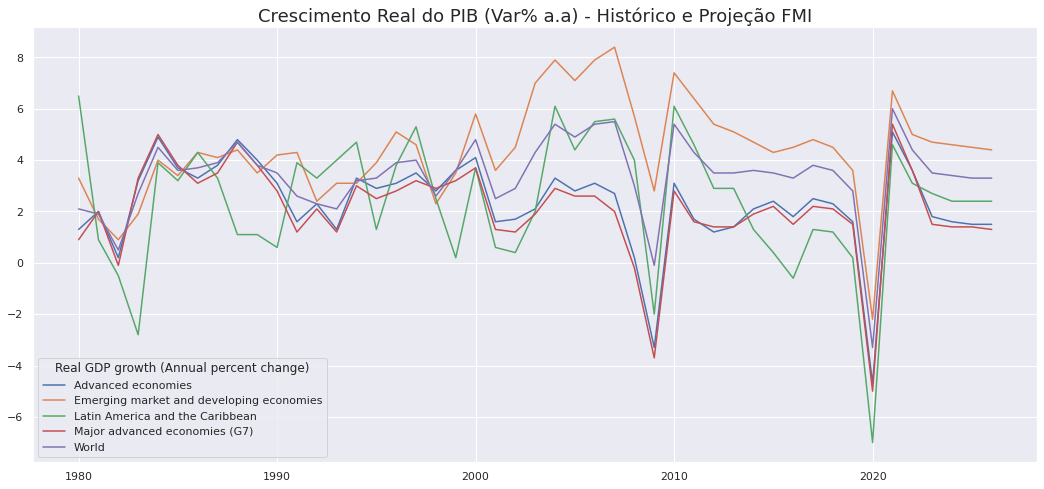

In [154]:
fmi_data.plot(figsize = (18,8))
plt.title('Crescimento Real do PIB (Var% a.a) - Histórico e Projeção FMI',fontsize = 18)

plt.show()

## Defict Primário

In [ ]:
url_fiscal = 'http://sisweb.tesouro.gov.br/apex/cosis/thot/link/rtn/serie-historica?conteudo=cdn'

In [ ]:
fiscal = pd.read_excel(url_fiscal,sheet_name='1.1-A',skiprows=4)

In [ ]:
receita_total = fiscal.iloc[32][1:].astype(int)
despesa_total = fiscal.iloc[33][1:].astype(int)

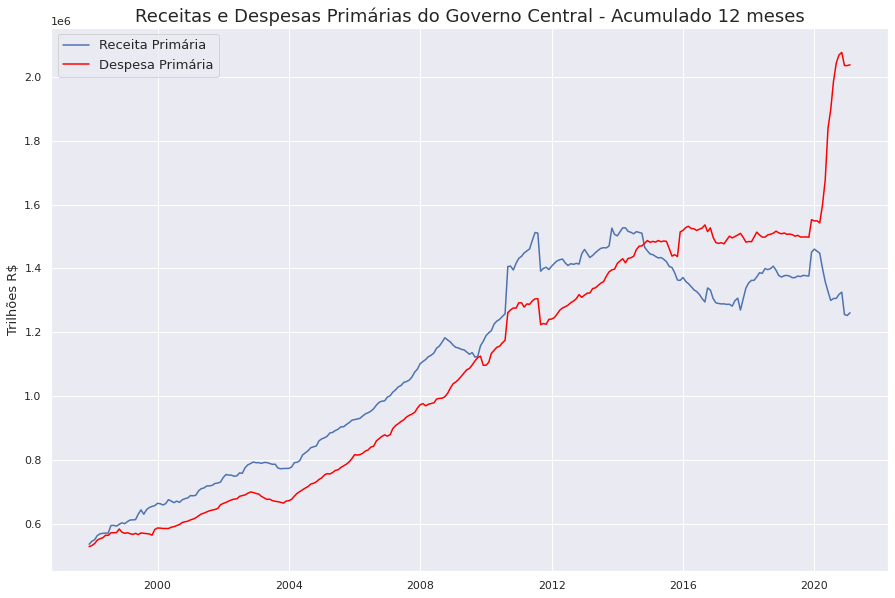

In [ ]:
plt.figure(figsize = (15,10))

plt.plot(receita_total.rolling(12).sum(), label = 'Receita Primária')
plt.plot(despesa_total.rolling(12).sum(), color='red', label = 'Despesa Primária')
plt.title('Receitas e Despesas Primárias do Governo Central - Acumulado 12 meses',fontsize = 18)
plt.ylabel('Trilhões R$', fontsize = 13)

plt.legend(fontsize = 13)

plt.show()

In [ ]:
resultado_primario = fiscal.iloc[60][1:].astype(int)

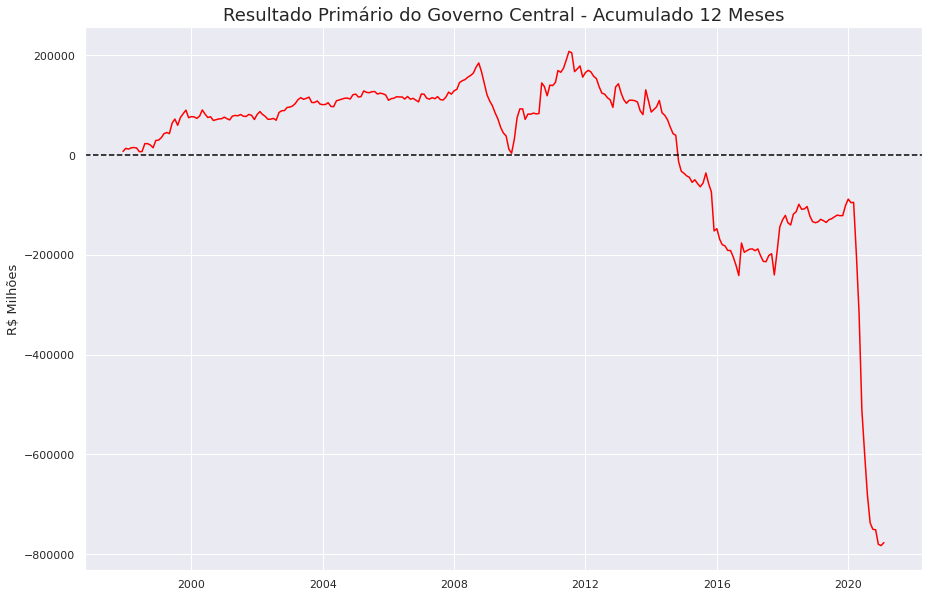

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(resultado_primario.rolling(12).sum(),color='red')
plt.title('Resultado Primário do Governo Central - Acumulado 12 Meses',fontsize=18)
plt.axhline(y=0,ls = '--', color = 'black')
plt.ylabel('R$ Milhões',fontsize=13)

plt.show()

In [ ]:
despesas = pd.DataFrame()
despesas['Total'] = fiscal.iloc[33][1:].astype(int)
despesas['Previdência'] = fiscal.iloc[34][1:].astype(int)
despesas['Pessoal e Encargos Sociais'] = fiscal.iloc[35][1:].astype(int)
despesas['Outras Despesas Obrigatórias'] = fiscal.iloc[36][1:].astype(int)
despesas['Discricionárias'] = fiscal.iloc[57][1:].astype(int)

In [ ]:
despesas_prop = despesas[['Previdência','Pessoal e Encargos Sociais','Outras Despesas Obrigatórias','Discricionárias']].div(despesas.Total, axis=0)

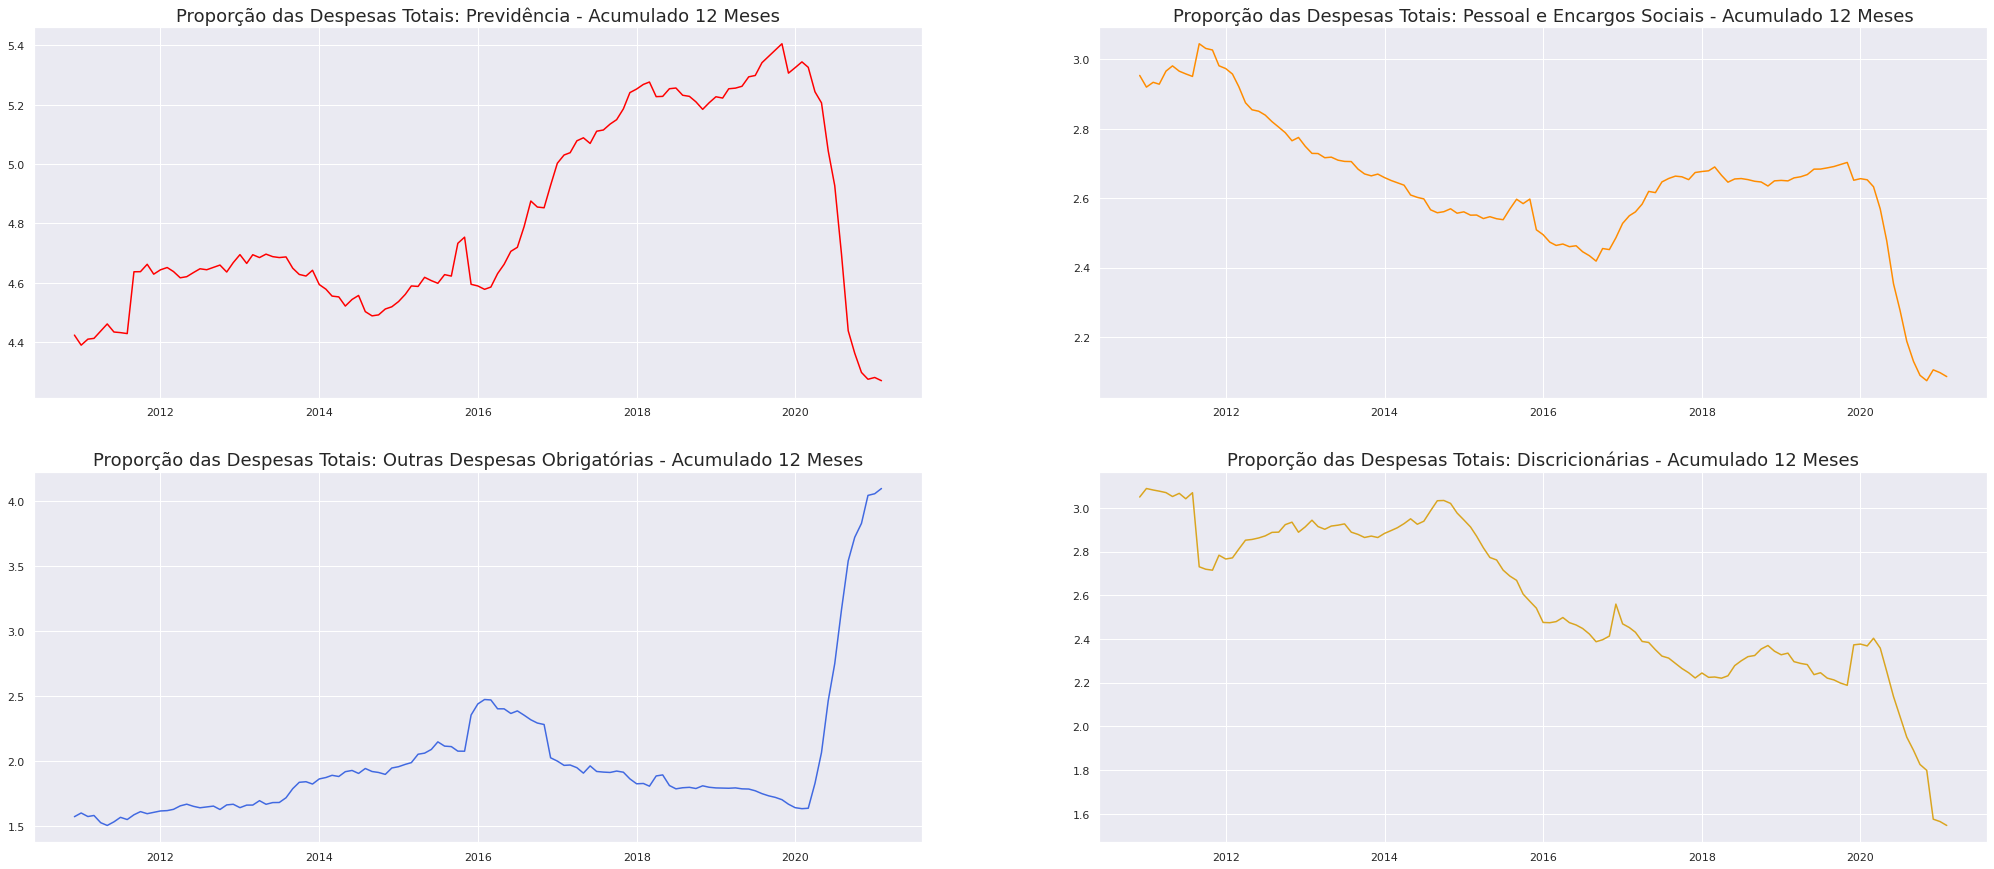

In [ ]:
f = plt.figure(figsize=(35,15))
colors = ['red','darkorange','royalblue','goldenrod']
for i,n in enumerate(despesas_prop.columns):
  f.add_subplot(2, 2, i+1)
  plt.plot(despesas_prop[despesas_prop.index >= '2010'][n].rolling(12).sum(),color=colors[i]) 
  plt.title(f'Proporção das Despesas Totais: {n} - Acumulado 12 Meses',fontsize=18)
#plt.tight_layout()
plt.show()

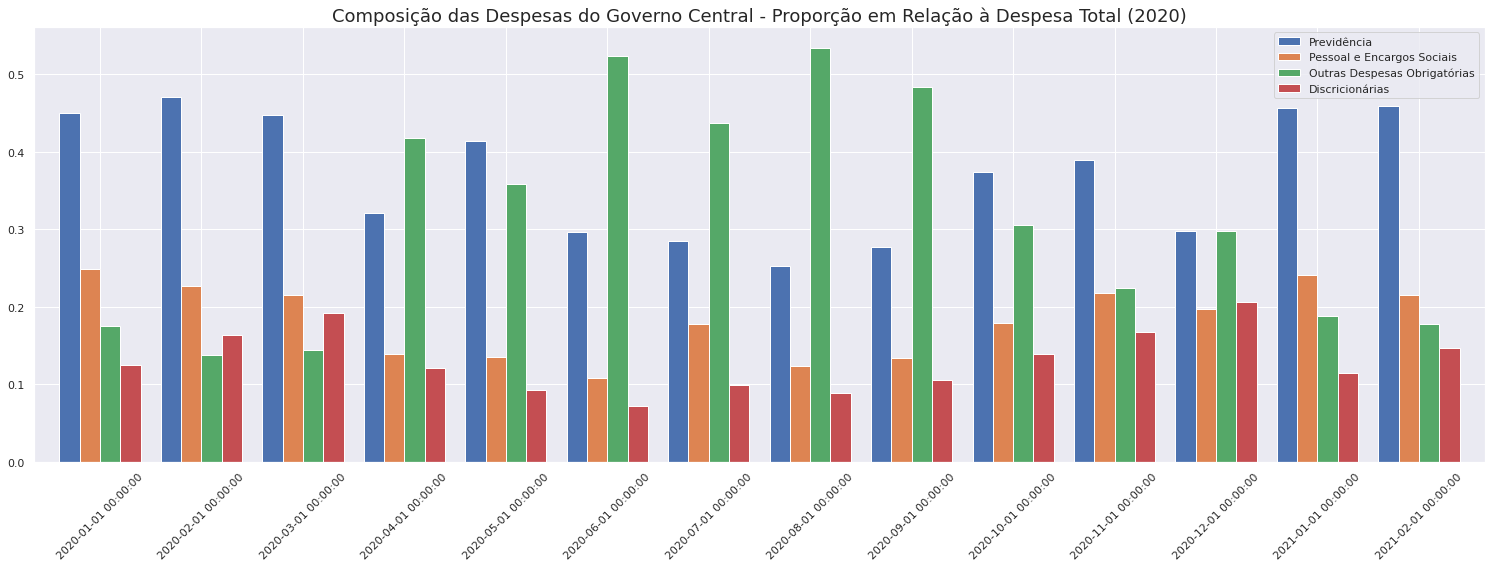

In [ ]:
despesas_prop[despesas_prop.index >= '2020'].plot.bar(figsize=(26,8),width = 0.8)
plt.title('Composição das Despesas do Governo Central - Proporção em Relação à Despesa Total (2020)',fontsize = 18)
plt.xticks(rotation=45)
plt.grid(axis = 'x')

plt.show()
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)